# OSCILLAZIONI FORZATE

In [11]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'oscillazioni_forzate_smorzate.csv'
fr = pd.read_csv(FILE)

omega = np.array(fr['omega']) # rad/s
A = np.array(fr['A']) * 0.01 # m

## interpolazione $A(\omega)$

$A(\omega) = \frac{M}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2\omega^2}}$

NOTA: vengono trascurati le incertezze sul valore di $\omega$, nel set di dati è riportato sia $\omega_f$ che $\omega$ misurato attraverso il periodo. Successivamente aggiungeremmo la trattazione dell'incertezza su $\omega$

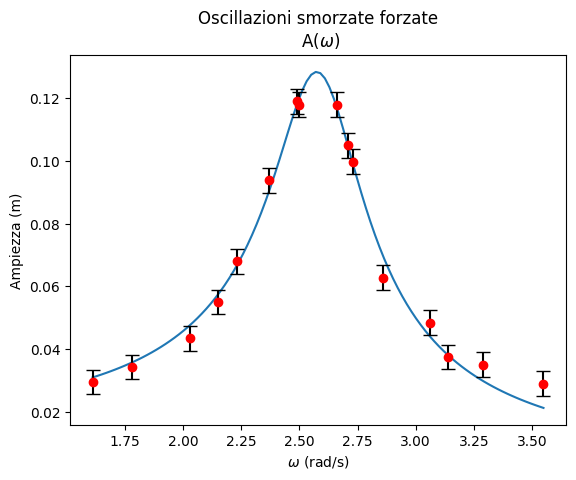

   
Parameters: {'M': 0.1288100373294997, 'w0': 2.588873563936724, 'gamma': 0.19422178141589408} 
Sigma parameters: {'M': 0.005143953768874091, 'w0': 0.007661535091961218, 'gamma': 0.01150855838976868}

sigmaY: 0.003936970682695269

covariance matrix: [[1.74679063e-05 5.01144365e-06 3.58116423e-05]
 [5.01144365e-06 3.87505909e-05 9.47120436e-06]
 [3.58116423e-05 9.47120436e-06 8.74356595e-05]]    

omega_0:  2.59 ± 0.01 


In [12]:
from interpolazione3 import Interpolazione, final_val
from matplotlib import pyplot as plt

def A_w(w, M, w0, gamma):
    return M/np.sqrt((w0**2 - w**2)**2 + 4 * gamma**2 * w**2)

r = Interpolazione(omega,A,A_w,names=['M','w0','gamma'])

plt.plot(r.x_best, r.y_best)
plt.errorbar(omega,A,yerr=r.sigmaY,fmt='o',color='red',ecolor="black",capsize=5)
plt.title('Oscillazioni smorzate forzate\n A($\omega$)')
plt.ylabel("Ampiezza (m)")
plt.xlabel("$\omega$ (rad/s)")
plt.show()

print(r)
print('omega_0: ', final_val(r.bval['w0'],r.sigma_bval['w0']))

### incertezze su $\omega$

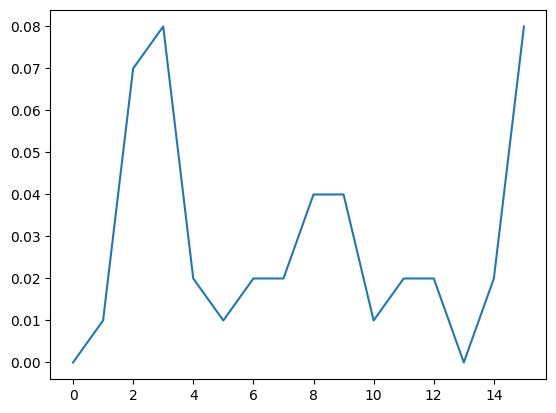

In [15]:

omega = np.array(fr['omega']) # rad/s
omegaf = np.array(fr['omegaf']) # rad/s

h = np.abs(omegaf - omega)

plt.plot(h)
plt.show()